In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [15]:
from tensorflow import keras
from keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [3]:
x_train.shape

(50000, 32, 32, 3)

In [4]:
x_test.shape

(10000, 32, 32, 3)

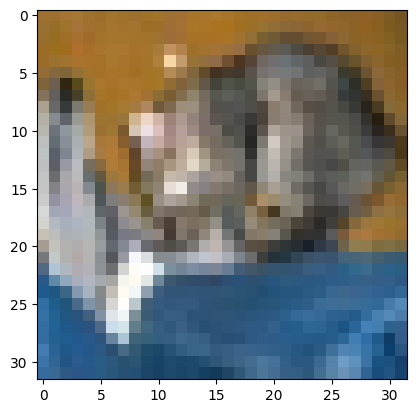

In [5]:
plt.imshow(x_test[0])

In [16]:
y_test.shape

(10000, 1)

In [17]:
y_test

array([[3],
       [8],
       [8],
       ...,
       [5],
       [1],
       [7]], dtype=uint8)

we need to one hot encode the labels

In [18]:
from keras.utils import to_categorical
y_cat_test= to_categorical(y_test,10)
y_cat_train= to_categorical(y_train,10)

In [11]:
#normalizing our input
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# x_train= scaler.fit_transform(x_train)
# x_test= scaler.transform(x_test)

#it's better to just divide x_train and x_test by 255 because MinMaxScaler can only accept <=2 args.
x_train= x_train/255
x_test= x_test/255


In [12]:
x_train.shape

(50000, 32, 32, 3)

Now we move to creating our CNN

In [14]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten

model = Sequential()

model.add(Conv2D(32, (4,4), input_shape=(x_train.shape[1:]), activation='relu'))
model.add(MaxPool2D())
model.add(Conv2D(32, (4,4), input_shape=(x_train.shape[1:]), activation='relu'))
model.add(MaxPool2D())
model.add(Conv2D(32, (4,4), input_shape=(x_train.shape[1:]), activation='relu'))
model.add(MaxPool2D())

model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])



In [19]:
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(patience=3, mode='min')
model.fit(x_train, y_cat_train, epochs=15, callbacks=[early_stopping], validation_data=(x_test, y_cat_test))

Epoch 1/15
1563/1563 [==============================] - 81s 50ms/step - loss: 1.7479 - accuracy: 0.3644 - val_loss: 1.5026 - val_accuracy: 0.4494
Epoch 2/15
1563/1563 [==============================] - 81s 52ms/step - loss: 1.4782 - accuracy: 0.4643 - val_loss: 1.4422 - val_accuracy: 0.4871
Epoch 3/15
1563/1563 [==============================] - 78s 50ms/step - loss: 1.3716 - accuracy: 0.5093 - val_loss: 1.4797 - val_accuracy: 0.4642
Epoch 4/15
1563/1563 [==============================] - 80s 51ms/step - loss: 1.2970 - accuracy: 0.5369 - val_loss: 1.3866 - val_accuracy: 0.5186
Epoch 5/15
1563/1563 [==============================] - 79s 50ms/step - loss: 1.2398 - accuracy: 0.5598 - val_loss: 1.3193 - val_accuracy: 0.5312
Epoch 6/15
1563/1563 [==============================] - 80s 51ms/step - loss: 1.1920 - accuracy: 0.5799 - val_loss: 1.2569 - val_accuracy: 0.5557
Epoch 7/15
1563/1563 [==============================] - 80s 51ms/step - loss: 1.1532 - accuracy: 0.5979 - val_loss: 1.2973 -

<AxesSubplot: >

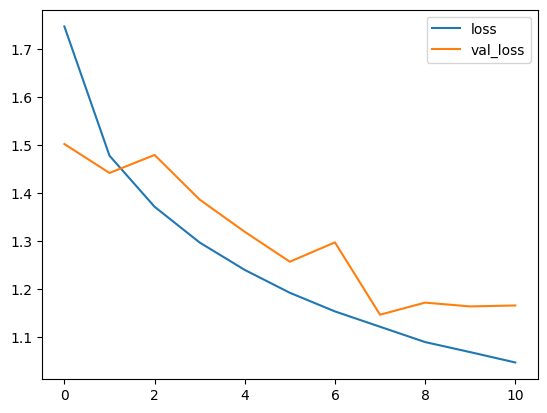

In [20]:
metrics_df= pd.DataFrame(model.history.history)
metrics_df[['loss', 'val_loss']].plot()

In [21]:
predictions= np.argmax(model.predict(x_test), axis=-1)

313/313 [==============================] - 5s 15ms/step


In [22]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.62      0.66      0.64      1000
           1       0.73      0.77      0.75      1000
           2       0.44      0.61      0.51      1000
           3       0.42      0.40      0.41      1000
           4       0.65      0.42      0.52      1000
           5       0.49      0.60      0.54      1000
           6       0.71      0.64      0.68      1000
           7       0.69      0.66      0.67      1000
           8       0.69      0.66      0.67      1000
           9       0.73      0.63      0.68      1000

    accuracy                           0.60     10000
   macro avg       0.62      0.60      0.61     10000
weighted avg       0.62      0.60      0.61     10000



predicting a given image

In [23]:
my_img= x_test[16]
my_img.shape

(32, 32, 3)

In [24]:
my_img= my_img/255

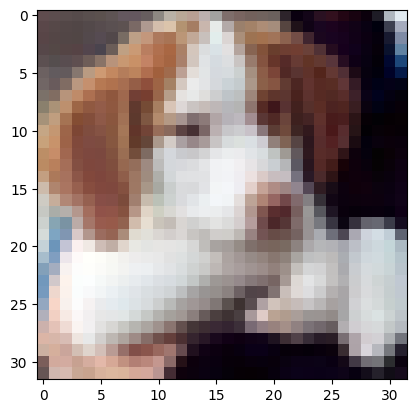

In [25]:
plt.imshow(my_img)

In [30]:
np.argmax(model.predict(my_img.reshape(1,32,32,3)))

1/1 [==============================] - 0s 152ms/step


4

In [27]:
x_test[16].shape

(32, 32, 3)

In [28]:
x_test[16]

array([[[ 95,  76,  78],
        [ 92,  77,  78],
        [ 89,  77,  77],
        ...,
        [ 30,  28,  38],
        [175, 183, 191],
        [225, 234, 240]],

       [[ 90,  71,  73],
        [ 86,  72,  72],
        [ 83,  71,  71],
        ...,
        [  0,   0,  13],
        [ 60,  63,  79],
        [165, 171, 189]],

       [[ 88,  69,  71],
        [ 84,  70,  70],
        [ 82,  70,  70],
        ...,
        [  5,   0,  12],
        [ 24,  26,  48],
        [127, 139, 165]],

       ...,

       [[203, 176, 161],
        [213, 175, 156],
        [202, 165, 155],
        ...,
        [182, 183, 189],
        [118, 120, 125],
        [ 37,  32,  46]],

       [[123,  94,  90],
        [210, 170, 157],
        [211, 171, 160],
        ...,
        [116, 116, 120],
        [ 44,  45,  47],
        [ 11,   3,  15]],

       [[102,  85,  84],
        [208, 183, 175],
        [215, 186, 176],
        ...,
        [ 37,  33,  43],
        [ 17,  13,  22],
        [ 22,  11,  28]]

In [29]:
my_img

array([[[0.37254902, 0.29803922, 0.30588235],
        [0.36078431, 0.30196078, 0.30588235],
        [0.34901961, 0.30196078, 0.30196078],
        ...,
        [0.11764706, 0.10980392, 0.14901961],
        [0.68627451, 0.71764706, 0.74901961],
        [0.88235294, 0.91764706, 0.94117647]],

       [[0.35294118, 0.27843137, 0.28627451],
        [0.3372549 , 0.28235294, 0.28235294],
        [0.3254902 , 0.27843137, 0.27843137],
        ...,
        [0.        , 0.        , 0.05098039],
        [0.23529412, 0.24705882, 0.30980392],
        [0.64705882, 0.67058824, 0.74117647]],

       [[0.34509804, 0.27058824, 0.27843137],
        [0.32941176, 0.2745098 , 0.2745098 ],
        [0.32156863, 0.2745098 , 0.2745098 ],
        ...,
        [0.01960784, 0.        , 0.04705882],
        [0.09411765, 0.10196078, 0.18823529],
        [0.49803922, 0.54509804, 0.64705882]],

       ...,

       [[0.79607843, 0.69019608, 0.63137255],
        [0.83529412, 0.68627451, 0.61176471],
        [0.79215686, 0

In [31]:
x_test.shape

(10000, 32, 32, 3)